## Project 3
### **Sales Department** 

** Hi! Everyone
Well come to this new case study for companies to become competative and Skyrocket their Growth and Sales.

* They need to leverage Artificial and Machine learning to develop a predctive modesl so they can be able to forecast Sales in the furture.

* Predictive models attampt at forecasting furture Sales based on historical data while taking into accounts. Seasonality affects and demand holidays promptions and competition.

* **In this Project** we work as a data scientist in the Sales department and the Sales team provided you with data from eleven hundred stores.

* The objective is to predctive furture daily Sales based on some features such as Stores promotions Store, Size school and state holidays, Distance away from compition and what type of products do therese stores carry.

* In this case study we are going to learn many Skills.

 ***Here are the main learning out comes:***

* Understand how to leverage the Power of data Science to predict furture product Sales.

* Understand the theory and intuition behind time Series forecasting models.

* Understand the thorey behind Facebook prophet time series forcasting tool.

* Understand the concept of additive regression

* List the adventages of Facebook Prophet.

* Apply Facebook Prophet to Predict future Sales using VR real wordl dataset.

* Predict furture **Weekly**, **Montly** and **Yearly** trends. 

### Let's get started


### Task#1:**UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE**


# INPUTS AND EXPECTED OUTPUTS

* **Id**: Transaction ID (Combination of Store and Data).
* **Store**: Unique store id
* **Sales**: Sales/Day, this is the target variable.
* **Customers**: number of customers on a given day
* **Open**: Boolean to day wheather a store is open or closed( 0 = closed, 1 = open)
* **Promo**: Describe if store is running a promot on that day or not. 
* **StateHoliday**: Indicate which state holiday(a = public holiday, b = Easter holiday, c = Christmas, 0 = None).
* **SchoolHoliday**: Indicate if the (Store, Date) was affected by the closure of public schools. 
* **StoreType**: Categorical variables to indicates type of store(a, b, c, d)
* **Assortment**: a = basic, b = extra, c= extended (Based on the size and location of the store)
* **CompetitionDistance(meters)**: Distance to closest competitor store.
* **CompetionOpenSince[Month/Year]**: Data When competion was open.
* **Promo2**: Promo2 is a continuing and consecutive promotion for Some stores (0 = Store is not participating, 1 = Store is participating).
* **Promo2 Since[Year/Week]**: Date when store started participating in Promo2
* **PromoInterval**: Describe the consuecutive intervals, Promo2 is started, naming the months promotion is started a new 
    * E.g: "Feb, May, Aug, Nov" means each round starts in February, May, August, November of any given year for that store.







### Task#2: **IMPORT LIBRARIES AND DATASET**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import SAles Training Data
# You have to include the full link to the CSV file containing your dataset
sales_train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScienceProjects/SalesDepartment/train.csv")
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
sales_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [7]:
# Almost a million entries
# 1115 unique stores
# Sales is the target variable (that's what we are trying to predict)
# ID: Transaction ID (Combination of Store and Date)
# Store: Unique Store ID
# Sales: Sales/Day, this is target variable
# Customers: Number of customer on a given day.
# Open: 0 = closed, 1 = Open
# Promo: Describes if stores is running s promo on that day or not.
# StateHoliday: Indicates if the (Store, Date) was affected by the closure of public holiday.


In [8]:
# Let's check last 10 columns
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [9]:
# Total 9 columsn: 
#Store
#DayOfWeek
#Date
#Sales
#Customers
#Open
#Promo
#StateHoliday
#SchoolHoliday

# 8 Features, each contains 1017208 data points
# 1 target variable(Sales)
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
# Data Analysis
# Average Sales amount per day = 5573 Euros
# Average number of Customers = ~633
# Minimum number of Customers = 0
# Maximum number of Customers = 7388


### Task#2.2: **IMPORT STORE INFORMATION**

In [12]:
store_info_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScienceProjects/SalesDepartment/store.csv")

In [13]:
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
store_info_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [16]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [17]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [18]:
store_info_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

###  **Explore Store Data**
* **Store**: Store Unique ID,
* **StoreType**: Categorical variable to indicate type of store (a, b, c, d) 
* **Assortment**: Describes an assortment level(a = basic, b = extra, c = extended)
* **CompetitionDistance**:Distance to closest competition store
* **CompetitionOpenSince[Month/Year]**: Provides an estimate fo the date When competion was open.
* **Promo2**: Promo2 is a continuing and consecutive promotion for some stores (0 = Store is not participating, 1 = Store is participating)
* **Promo2Since[Week/Year]**: Date when the store started participating in Promo2
* **PromoInterval**:Describe the consecutive intervals Promo2 is started, naming the months the promotion is started a new 
    * E.g Feb, May, Aug, Nov" means


### Task#3: **EXPLORE BOTH SALES AND TRAINING DATASETS**

### Task#3.1: **EXPLORE SALES TRAIN DATA**


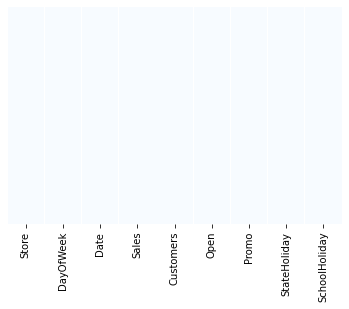

In [19]:
# Let's see any if we have any missing data
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67337aff60>,
      dtype=object)

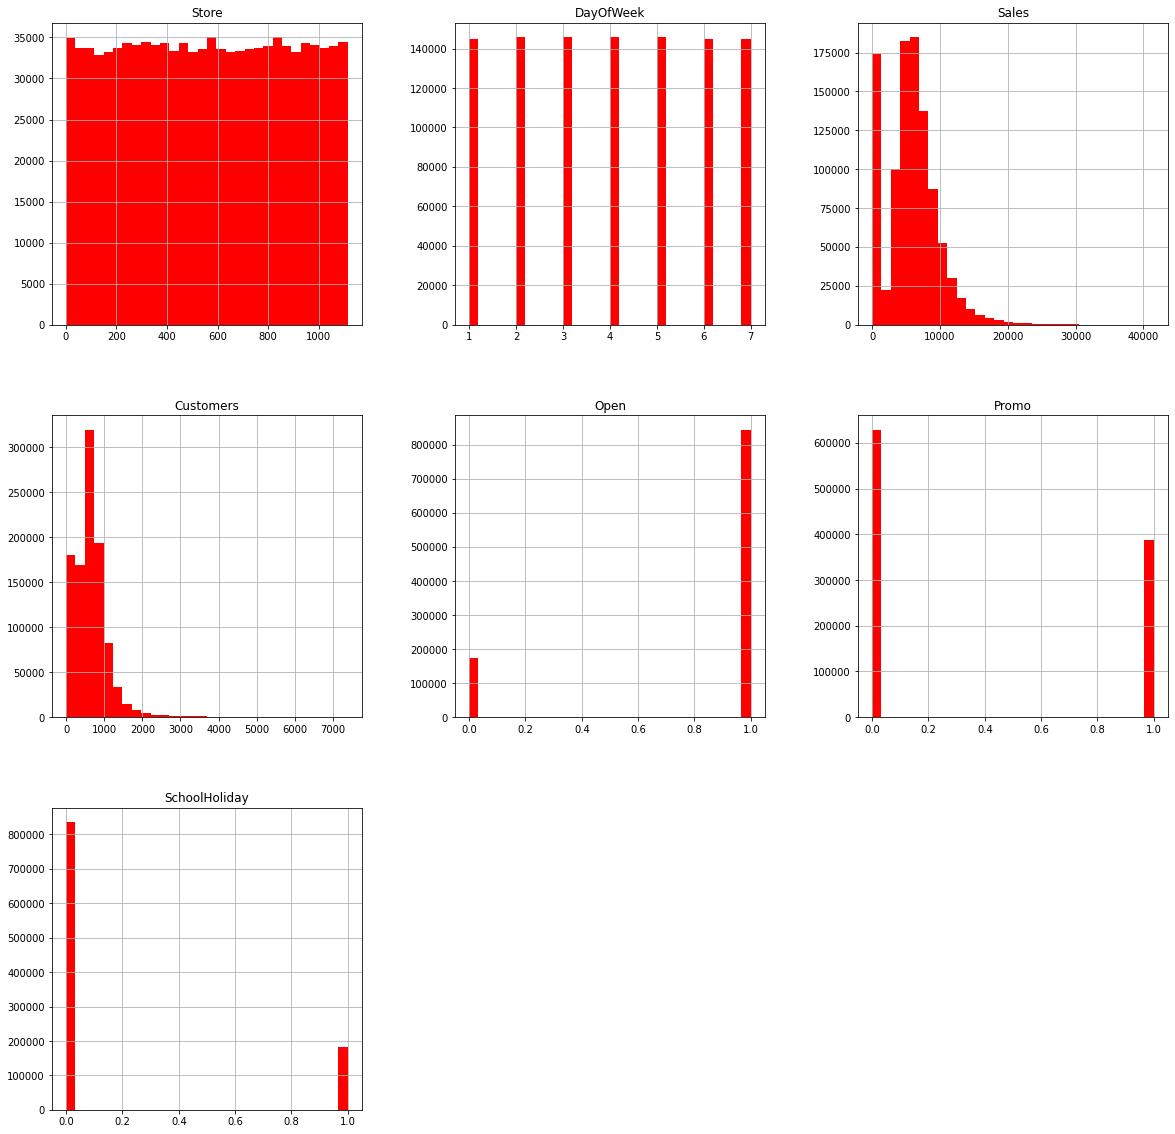

In [20]:
# Let's figure out the histogram diagram for Sales Train Data
sales_train_df.hist(bins = 30, figsize= (20, 20), color = 'r')

In [21]:
# Data Analysis
# Average 600 customers per day
# Maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distributed accross various Days of the week (~150000) observations  X 7 days = ~1.1 Million Observations.
# Stores are open 80% of the time
# Promo #1 was running ~40% of the time
# Average Sales around 5000-6000 EUROS
# School holidays are around ~18% of the time.


In [22]:
# Let's check maximum customers
sales_train_df['Customers'].max()
# Maxmimum customer per day 7388

7388

In [23]:
# Let's see how many stores are open and closed
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]


In [24]:
closed_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [25]:
open_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [26]:
# Count the number of stores are Open and Closed
print("Total = ",len(sales_train_df))
print("Number of Open Stores: ", len(open_train_df))
print("Number of Closed Stores: ", len(closed_train_df))

Total =  1017209
Number of Open Stores:  844392
Number of Closed Stores:  172817


In [27]:
# Only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [28]:
# Let's drop the open columns since it has no meaning now
sales_train_df.drop(['Open'], axis= 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


### Task#3.2 **EXPLORE STORES INFORMATION DATA**


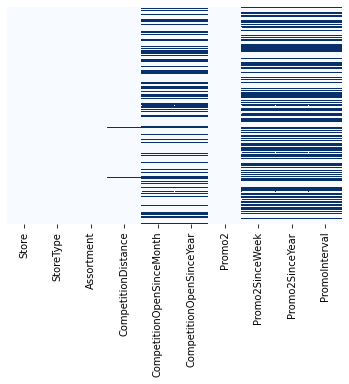

In [30]:
# Let's see if we have any missing data in the store information dataframe
sns.heatmap(store_info_df.isnull(), yticklabels= False, cbar = False, cmap= 'Blues')

In [31]:
# Let's take a look at the missing values in the 'CompetitionDistance' 
store_info_df[store_info_df['CompetitionDistance'].isnull()]

# Only three rows are missing


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [32]:
# Let's take a look at the missing values in the "CompetitionOpenSinceMonth"
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

# Many rows missing = 354(almost one thrid of the 1115 stores)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [33]:
# Let's take a look at the missing values in the "CompetitionOpenSinceMonth"
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

# Many rows missing = 354(almost one thrid of the 1115 stores)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
# Let's see when Promo2 Zero
store_info_df[store_info_df['Promo2'] == 0]

# It seems like if 'Promo2' is Zero by default 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' information is set to Zero


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [35]:
# There are 354 rows where 'CompetitionSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to Zeros
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'] 

for str in str_cols:
    store_info_df[str].fillna(0, inplace= True)



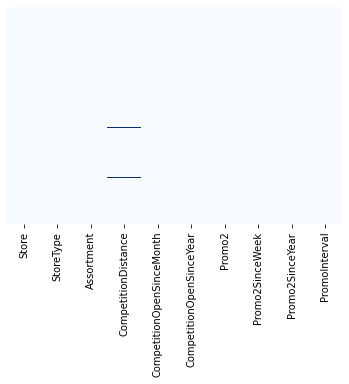

In [36]:
# Let's check the heat map to know missing values
sns.heatmap(store_info_df.isnull(), yticklabels= False, cbar= False, cmap= 'Blues')


In [37]:
# There are 3 rows with 'CompetitionDistance' values missing, let's fill them up with average value of the 'CompetitionDistance
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)


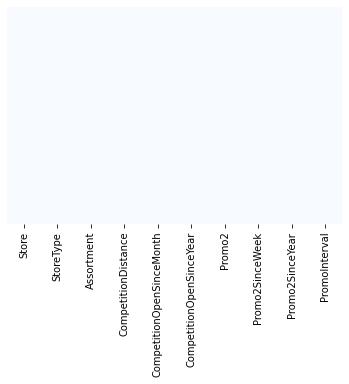

In [38]:
# Let's check the heat map to know missing values
sns.heatmap(store_info_df.isnull(), yticklabels= False, cbar= False, cmap= 'Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6731e2f940>,
      dtype=object)

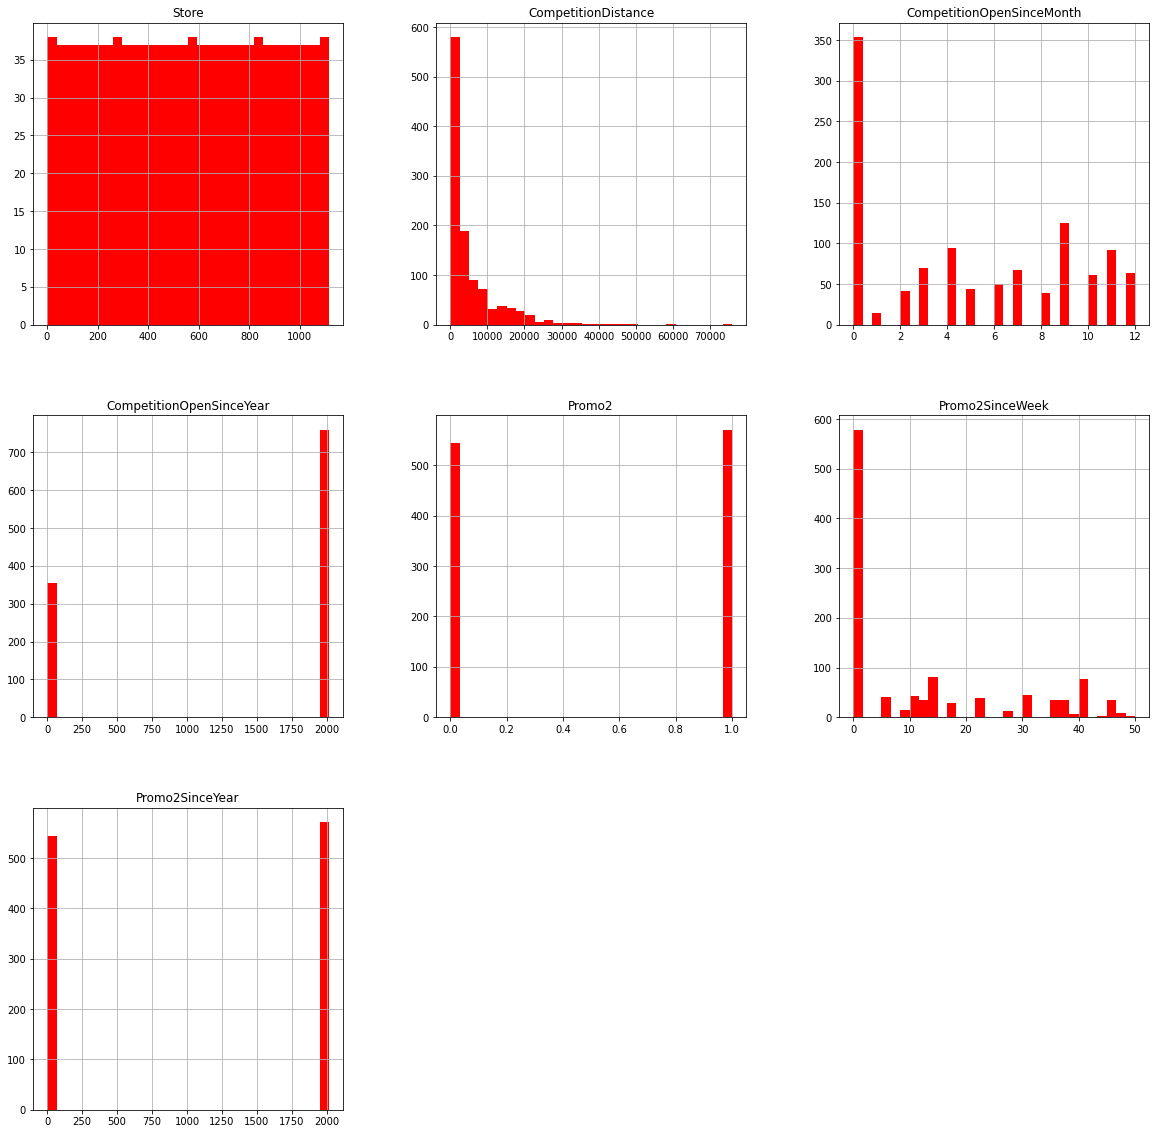

In [39]:
# Let's go ahead and plot the histogram for my store info datafreame
store_info_df.hist(bins= 30, figsize=(20, 20), color = 'r')


In [40]:
# Half of store are involved in Promo2
# half of the stores have their competion at distance of 0-300m(3kms away)


### Task#3.3 **EXPLORE MERGED DATASET**


In [41]:
# Let's merge both dataframes together based on 'Store'

sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')


In [42]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [43]:
# Let's take a look at the correlations between the data
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

# Customers and Promo are positively correlated with the sales
# Promo2 does not seem to be effictive at all


DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

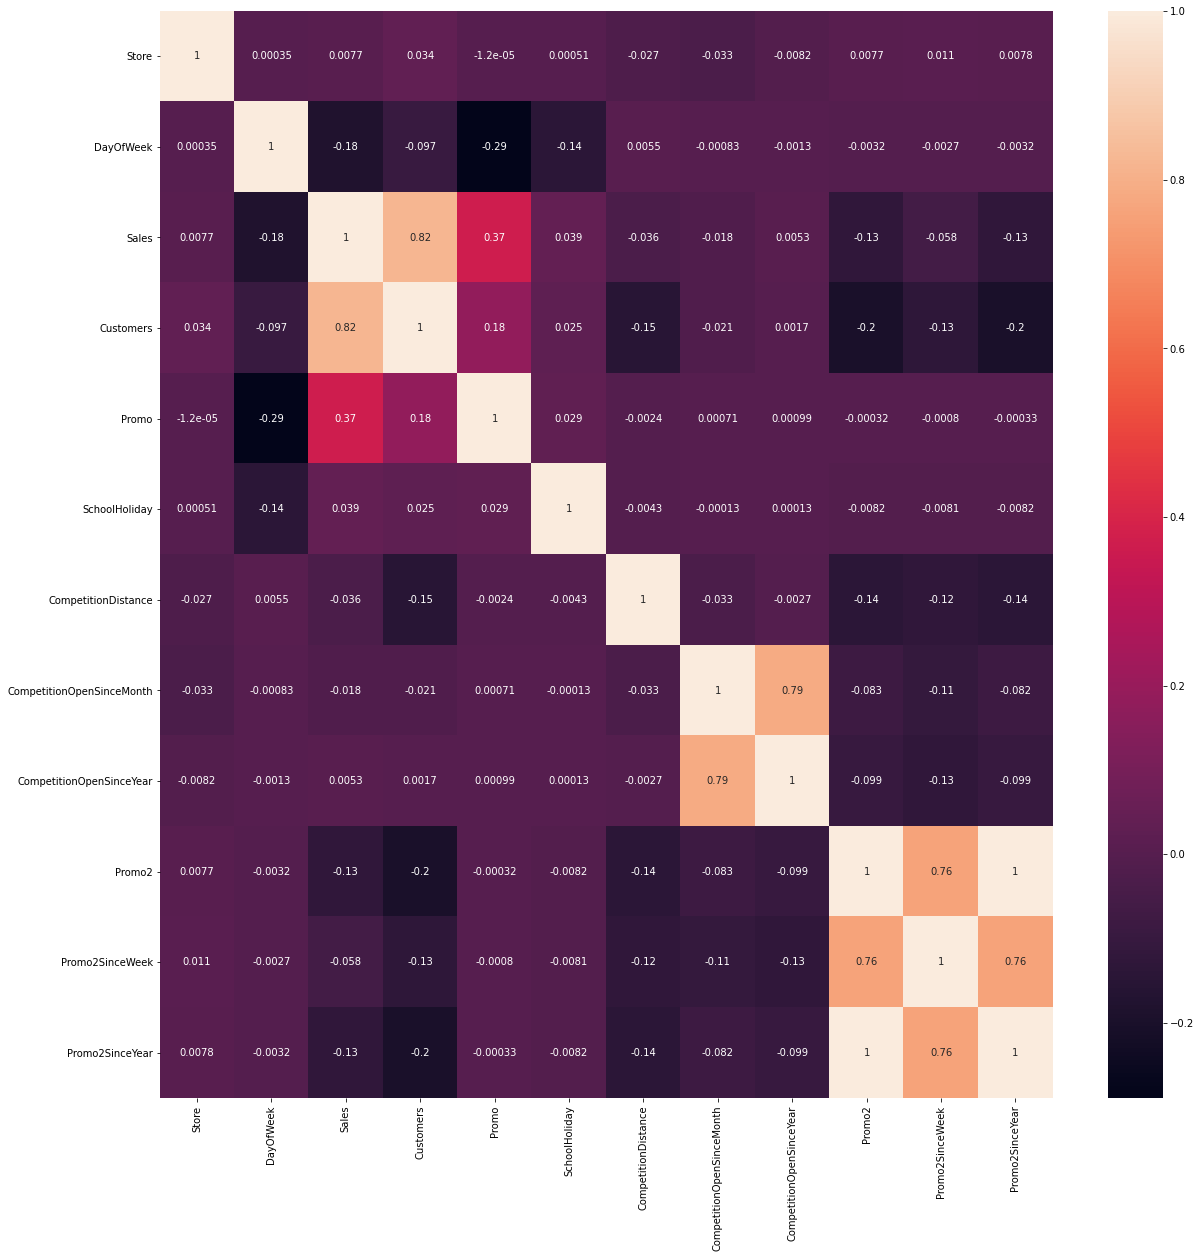

In [44]:
# The next step is now I can visualize our HeatMap and we can visualize all the Correlations in the just one diagram.

correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot= True)

# Customer/Promo2 and Sales are strongly Correleted.


In [45]:
# Let's separate the Year and put it into a separate column.
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year


In [46]:
# Let's do the same for the Day and Month
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month


In [47]:
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [48]:
sales_train_all_df


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


<Figure size 432x288 with 0 Axes>

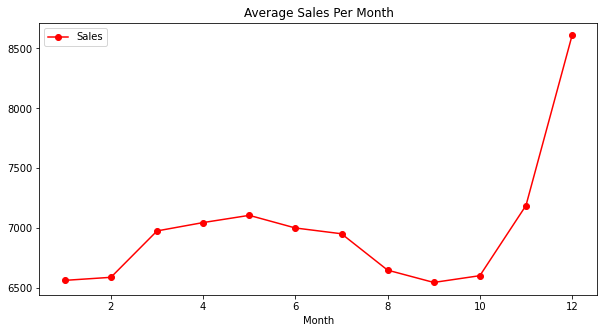

<Figure size 432x288 with 0 Axes>

In [49]:
# Let's take a look at the average Sales and Number of customers per month
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')
plt.figure()

# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the Sales column

Text(0.5, 1.0, 'Average Customers Per Month')

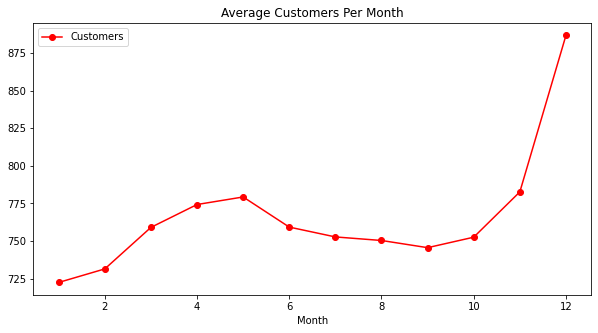

In [50]:
# It looks like Sales and Number of customers peak around christmas timeframe
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize= (10, 5), marker = 'o', color = 'r')
axis.set_title("Average Customers Per Month")


<Figure size 432x288 with 0 Axes>

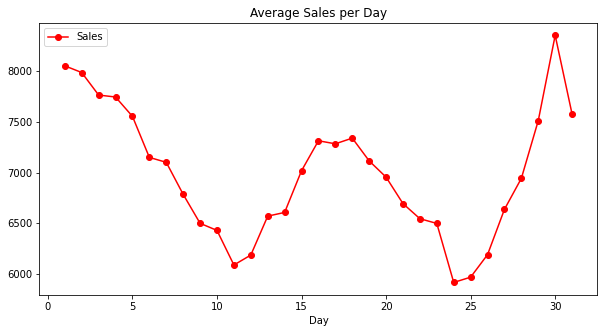

<Figure size 432x288 with 0 Axes>

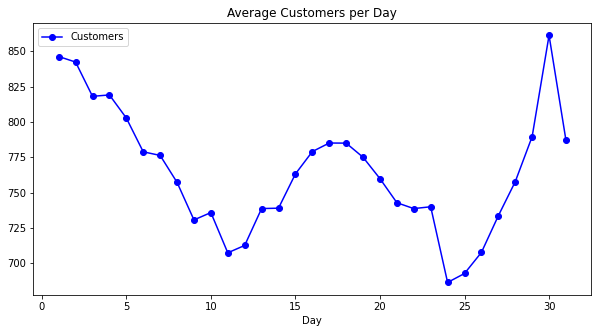

<Figure size 432x288 with 0 Axes>

In [51]:
# Let's take a look at the Sales and Customers per day of the Month instead
# Minimum number of customers are generally around the 24th of the Month
# Most customers and Sales are around 30th and 1st of the Month

# Sales per Day
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Average Sales per Day")
plt.figure()

# Customers per Day
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title("Average Customers per Day")
plt.figure()



<Figure size 432x288 with 0 Axes>

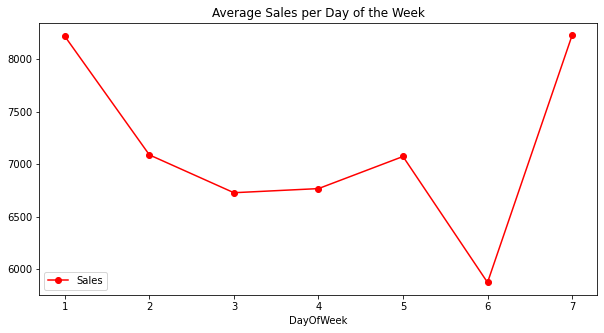

<Figure size 432x288 with 0 Axes>

In [52]:
# Let's do the same for the day of the week (note that 7 = Sunday)
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales per Day of the Week')
plt.figure()

<Figure size 432x288 with 0 Axes>

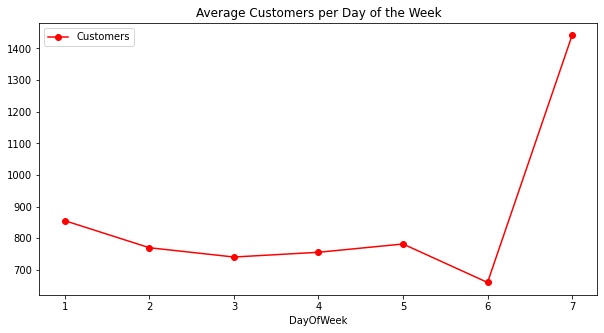

<Figure size 432x288 with 0 Axes>

In [53]:
# Let's do the same for the day of the week (note that 7 = Sunday)
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Customers per Day of the Week')
plt.figure()

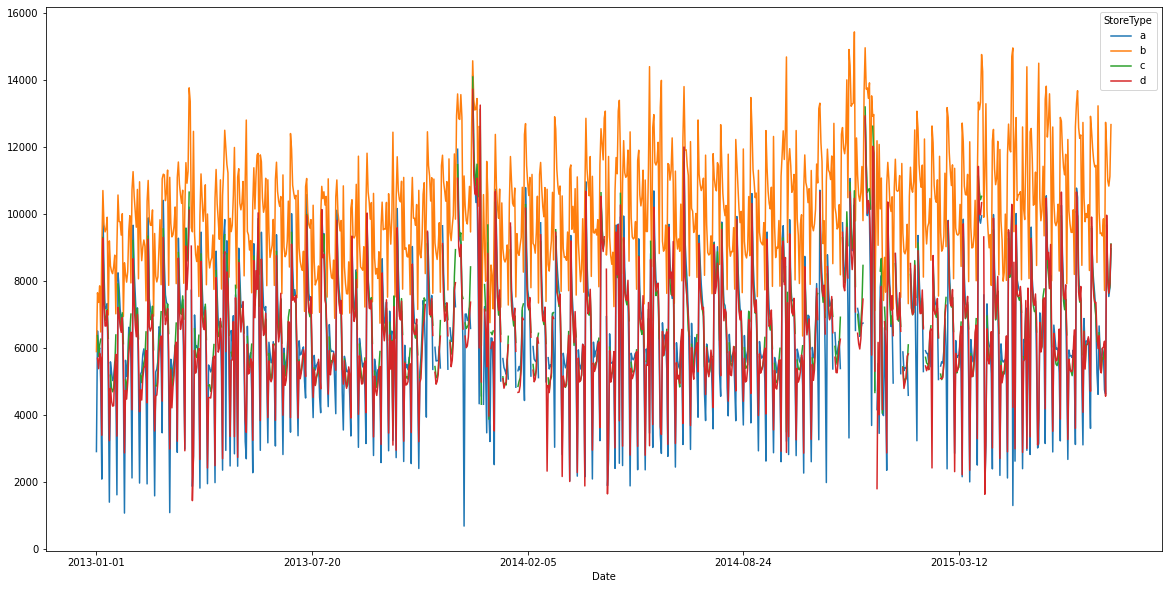

In [54]:
# Let's plot all our Date and the Stores type as well. We just wanted to see which store type has the highest number of sales and highest number of dollars basically coming in
fig, ax = plt.subplots(figsize = (20, 10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax= ax) 

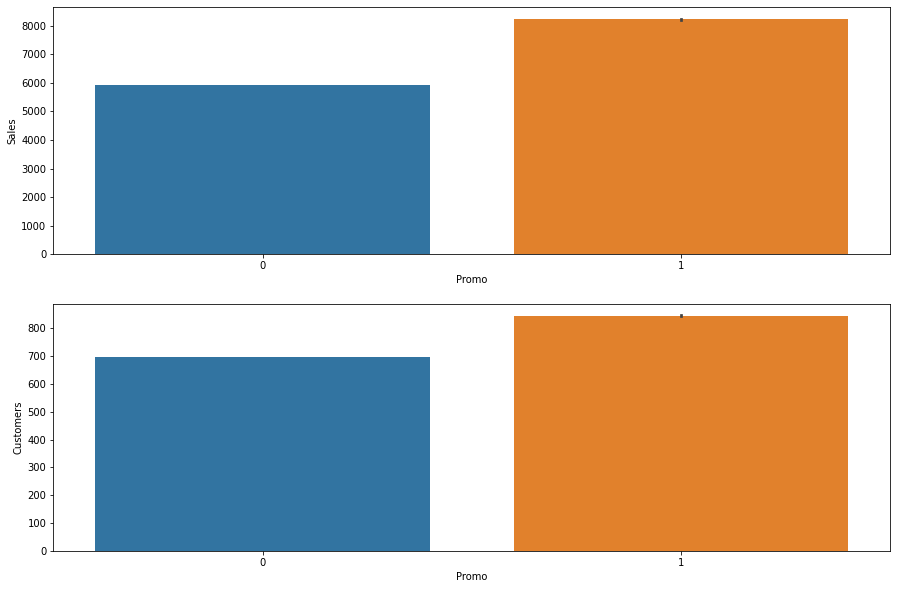

In [55]:
# I wanted to plot the bar plot and
# I wanted to do a violent plot as well fro the Promo and Sales and Customers.
plt.figure(figsize= [15, 10])

plt.subplot(211)
sns.barplot(x='Promo', y='Sales', data=sales_train_all_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)


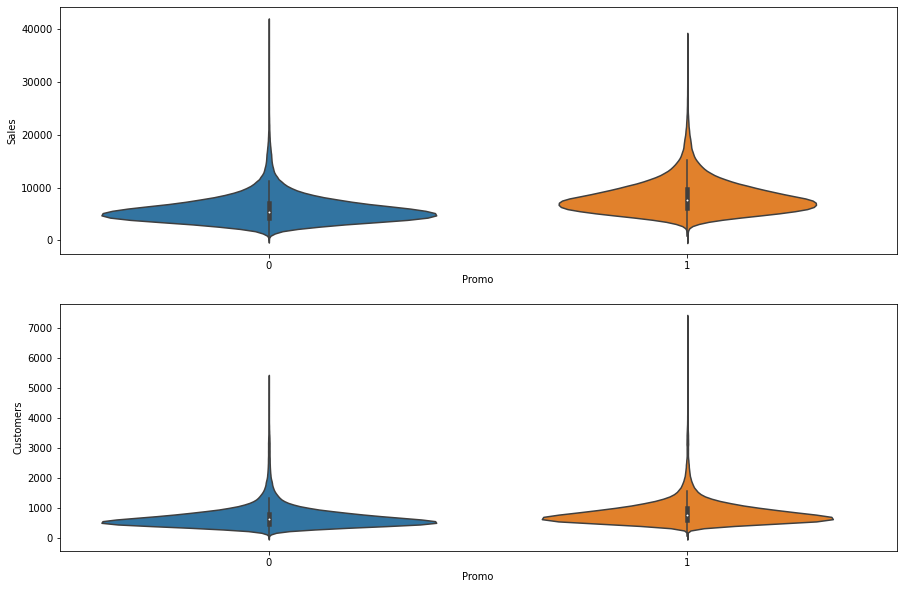

In [56]:
# Let's Violin plot for same data

plt.figure(figsize= [15, 10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)


### Task#4 **UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET**


## ***FACEBOOK PROPHET***

1. Prophet is open soruce software released by Facebook's core Data Science team
2. Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with Yearly, Weekly and Daily seasonality, plus holiday effects.
3.  Prophet works best with time series that have strong seasonal effects and Serveral Seasons of historical data.



* Facebook Prophet implements an additive regression model with four elements:
 * A piecewise linear, Prophet automatically picks up change points in the data and Identifies any changes in trends.
 * A yearly seasonal component modeled using Fourier Series.
 * A weekly seasonal component.
 * A holiday list that can be manually provided.
 * Additive Regression modle takes the form:
 
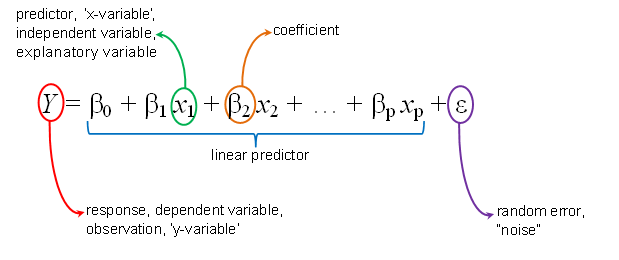

 ### **FACEBOOK PROPHET BENEFITS**

**ACCURATE AND FAST**
 
 * Facebook teams uses prohpet for accurate forecasting and planning.
 * Prophet can generate results in seconds automatic.
 * No need to perform data processing
 * Prophet works with missing data with serveral outliners.


**Domain Knowledge Integration**
* Users can tweak forecast by manually adding domain specific knowledge.



### Task#5: **TRAIN THE MODEL PART A**


In [57]:
# Let's import Facebook Prophet library
#import prophet
#!pip install fbprophet
from fbprophet import Prophet


In [112]:
# Let's going to crate function check speicific Store Sales informaiton 
def sales_predictions(Store_ID, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    # Let's rename Date and Sales columns
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')


    # Create Prophet Model
    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.predict(future)
    figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


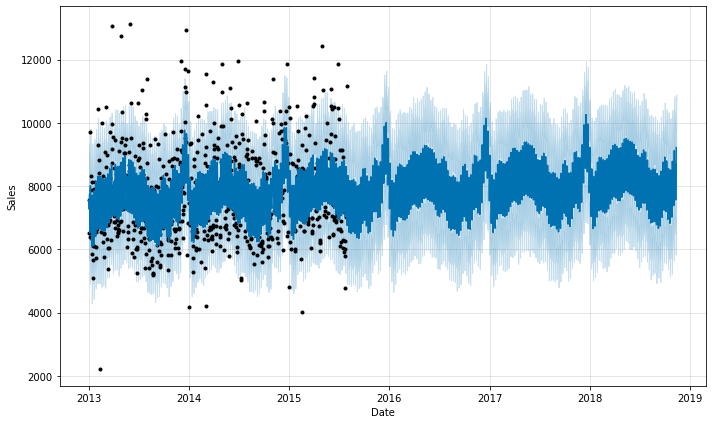

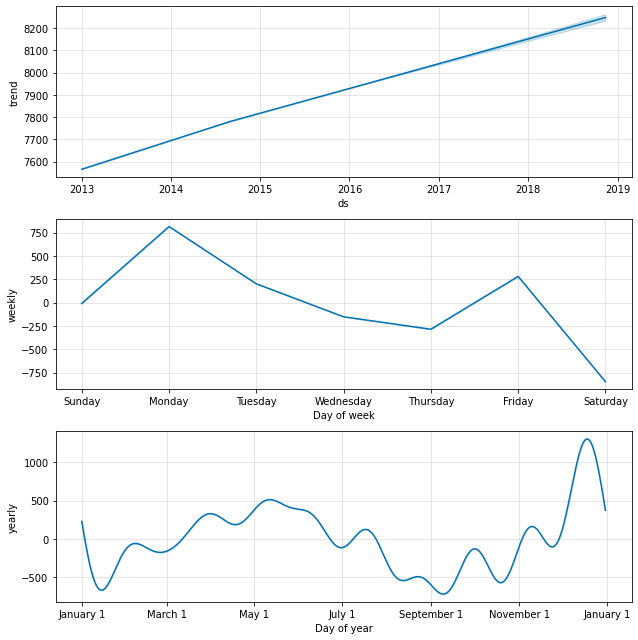

In [113]:
sales_predictions(200, sales_train_all_df, 1200)


### Task#6 **TRAIN THE MODEL PART B**


* **StateHoliday**: Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are clsoed on public holidays and weekends (***a = public holiday, b = Easter Holidays, C = Christmas, 0 = None***)

* **SchoolHoliday**: Indicates if the (Store, Date) was affected by the closure of public schools.




In [114]:
# Let's create a same function and just add holdays in the function
def sales_holidays_predictions(Store_ID, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    # Let's rename Date and Sales columns
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')


    # Create Prophet Model
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.predict(future)
    figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)


In [98]:
# Get all the dates pertaining to school holidays

schoolholidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values


In [99]:
schoolholidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [100]:
schoolholidays.shape

(163457,)

In [101]:
# Let's get all dates pertainin g to state holidays

stateholidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | (sales_train_all_df['StateHoliday'] =='b') | (sales_train_all_df['StateHoliday']=='c')].loc[:,'Date'].values


In [102]:
stateholidays

array(['2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2014-10-03', '2013-10-03', '2015-05-01', '2014-10-31',
       '2014-05-01', '2013-10-03', '2013-05-01', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2013-08-15', '2015-05-25',
       '2015-05-14', '2015-05-01', '2015-04-06', '2015-04-03',
       '2015-01-01', '2014-12-26', '2014-12-25', '2014-10-03',
       '2014-06-09', '2014-05-29', '2014-05-01', '2014-04-21',
       '2014-04-18', '2014-01-01', '2013-12-26', '2013-12-25',
       '2013-10-03', '2013-05-20', '2013-05-09', '2013-05-01',
       '2013-04-01', '2013-03-29', '2013-01-01', '2014-10-03',
       '2015-06-04', '2014-06-19', '2013-05-30', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-10-03', '2014-10-03', '2013-

In [103]:
stateholidays.shape

(910,)

In [104]:
stateholidays = pd.DataFrame({'ds':pd.to_datetime(stateholidays), 'holiday':'stateholiday'})


In [105]:
stateholidays

,ds,holiday
0,2014-10-03,stateholiday
1,2013-10-03,stateholiday
2,2015-06-04,stateholiday
3,2014-06-19,stateholiday
4,2013-05-30,stateholiday
...,...,...
905,2013-04-01,stateholiday
906,2013-08-15,stateholiday
907,2015-06-04,stateholiday
908,2014-06-19,stateholiday


In [106]:
schoolholidays = pd.DataFrame({'ds':pd.to_datetime(schoolholidays), 'holiday':'schoolholidays'})


In [107]:
schoolholidays

,ds,holiday
0,2015-07-31,schoolholidays
1,2015-07-30,schoolholidays
2,2015-07-29,schoolholidays
3,2015-07-28,schoolholidays
4,2015-07-27,schoolholidays
...,...,...
163452,2013-02-05,schoolholidays
163453,2013-02-04,schoolholidays
163454,2013-01-04,schoolholidays
163455,2013-01-03,schoolholidays


In [108]:
# Let's concatenate both School and State holidays
school_state_holidays = pd.concat((stateholidays, schoolholidays))

In [91]:
school_state_holidays

,ds,holiday
0,2014-10-03,stateholiday
1,2013-10-03,stateholiday
2,2015-06-04,stateholiday
3,2014-06-19,stateholiday
4,2013-05-30,stateholiday
...,...,...
163452,2013-02-05,schoolholidays
163453,2013-02-04,schoolholidays
163454,2013-01-04,schoolholidays
163455,2013-01-03,schoolholidays


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


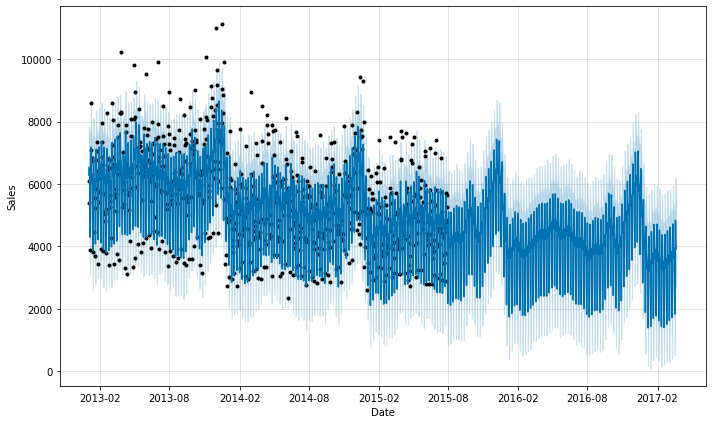

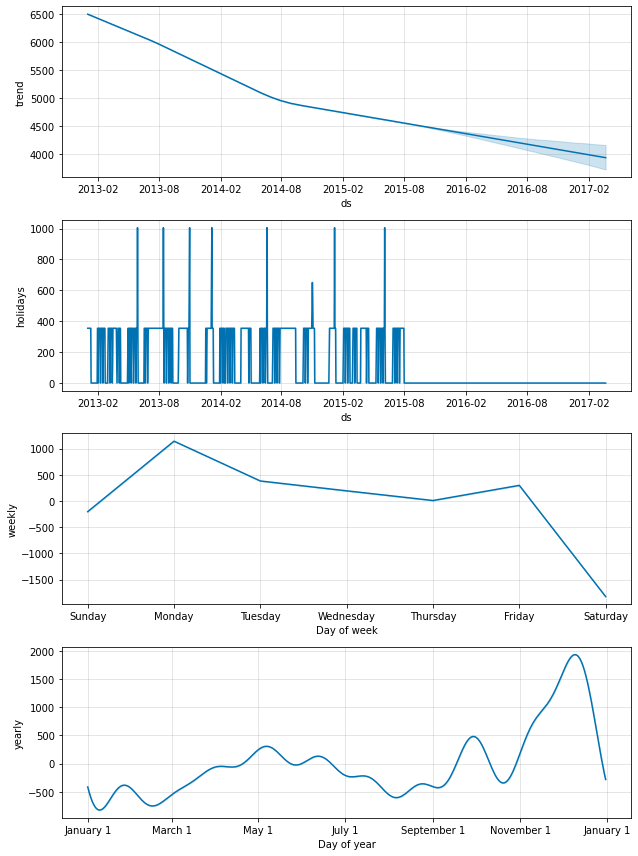

In [115]:
sales_holidays_predictions(6, sales_train_all_df, school_state_holidays, 600)

## **THAT'S ALL** ## **GREAT JOB!**